In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('data.csv')
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,Important,Very Important,Important,Very Important,Very Important,Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...


In [ ]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [ ]:
data.isnull().sum()

Age                                          0
Gender                                       0
Marital Status                               0
Occupation                                   0
Monthly Income                               0
Educational Qualifications                   0
Family size                                  0
latitude                                     0
longitude                                    0
Pin code                                     0
Medium (P1)                                  0
Medium (P2)                                  0
Meal(P1)                                     0
Meal(P2)                                     0
Perference(P1)                               0
Perference(P2)                               0
Ease and convenient                          0
Time saving                                  0
More restaurant choices                      0
Easy Payment option                          0
More Offers and Discount                     0
Good Food qua

In [ ]:
data.columns
dropCol = ['latitude', 'longitude','Educational Qualifications','Pin code','Reviews']
data.drop(dropCol, axis = 1, inplace=True)

In [ ]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Family size,Medium (P1),Medium (P2),Meal(P1),Meal(P2),...,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
0,20,Female,Single,Student,No Income,4,Food delivery apps,Web browser,Breakfast,Lunch,...,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes
1,24,Female,Single,Student,Below Rs.10000,3,Food delivery apps,Web browser,Snacks,Dinner,...,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes
2,22,Male,Single,Student,Below Rs.10000,3,Food delivery apps,Direct call,Lunch,Snacks,...,Yes,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes
3,22,Female,Single,Student,No Income,6,Food delivery apps,Walk-in,Snacks,Dinner,...,Yes,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes
4,22,Male,Single,Student,Below Rs.10000,4,Walk-in,Direct call,Lunch,Dinner,...,Yes,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes


In [ ]:
import scipy.stats as st 

# Correlation values for variables more than a threshold of 0.4
corr=[]
for i in data.columns:
    if i not in  ['latitude','longitude','Pin code','Output','Reviews']:
        df=pd.crosstab(data['Output'],data[i])
        stat, p, dof, expected = st.chi2_contingency(df,correction=True)
        t=min(df.shape)-1
        deno=sum(df.sum())*t
        x=np.sqrt(stat / deno)
        if(x>0.4): #thresold
             corr.append((i,x))
corr

[('Age', 0.41916612670006054),
 ('Ease and convenient', 0.6944483749782563),
 ('Time saving', 0.6333333550979008),
 ('More restaurant choices', 0.5897138785369491),
 ('Easy Payment option', 0.5571767618313485),
 ('More Offers and Discount', 0.5564505912203883),
 ('Good Food quality', 0.4243449172824401),
 ('Good Tracking system', 0.41749280981704445),
 ('Unaffordable', 0.40917014994986045),
 ('Maximum wait time', 0.4135981980209824)]

In [ ]:
# # Visualisation of Age
# keysAge = data['Age'].unique()
# usersAge = []
# valuesYesAge = []
# valuesNoAge = []
# keysAge.sort()
# for i in keysAge:
#   usersAge.append((data['Age'] == i).sum())

# df = data.groupby(['Age', 'Output'])
# d = df.size().to_frame('size')

# d.reset_index(inplace = True)

# ageYesValues = []
# ageNoValues = [0]
# for i in range(0, 29, 2):
#   ageYesValues.append(d['size'][i])

# for i in range(1, 30, 2):
#   ageNoValues.append(d['size'][i])

# ageYesValues.append(0)
# plt.figure(figsize=(10,8))
# plt.bar(keysAge-0.2, ageYesValues, width = 0.4)
# plt.bar(keysAge+0.2, ageNoValues, width = 0.4)
# plt.legend(["Yes", "No"])

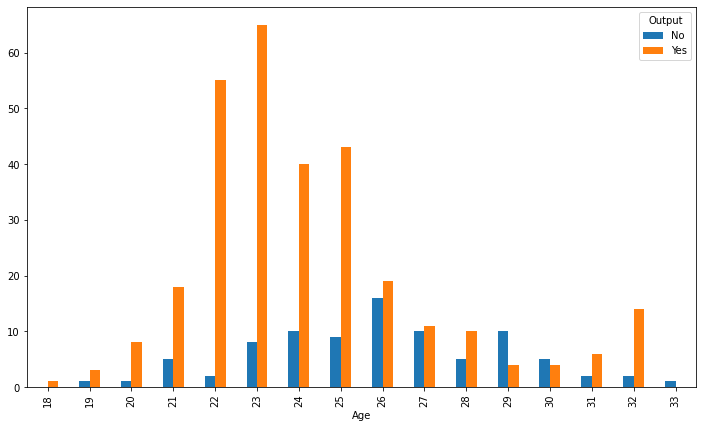

In [ ]:
ax = data.groupby(['Age']).Output.value_counts().reset_index(name='counts').pivot(index='Age', columns='Output', values='counts').plot(kind='bar', figsize = (12,7))

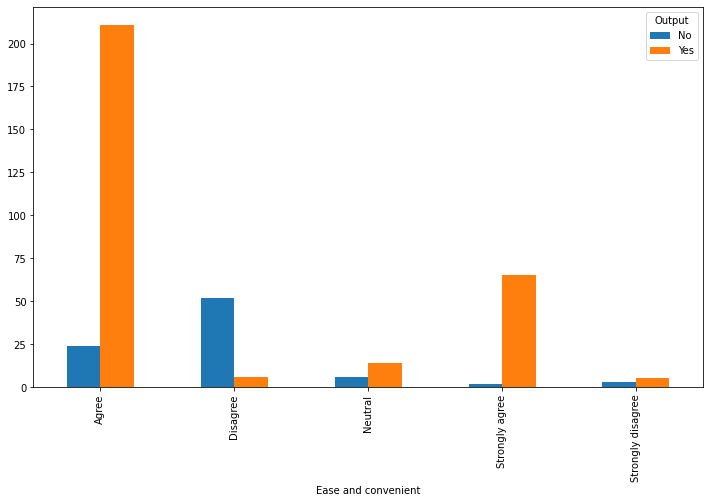

In [ ]:
ax = data.groupby(['Ease and convenient']).Output.value_counts().reset_index(name='counts').pivot(index='Ease and convenient', columns='Output', values='counts').plot(kind='bar', 
                                                                                                                                                                    figsize = (12,7))

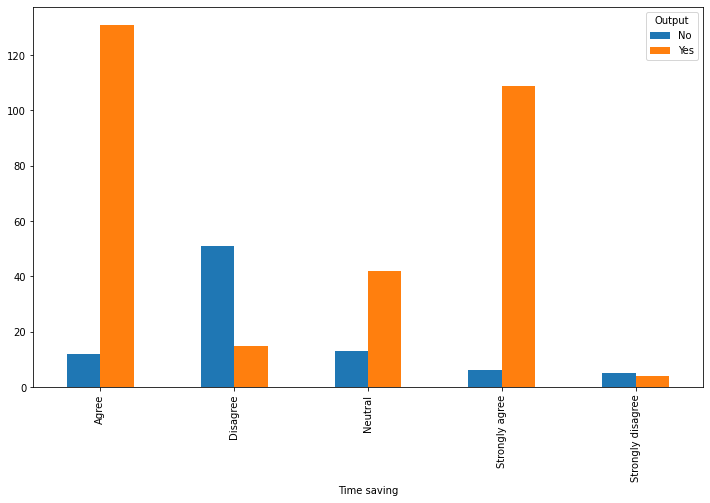

In [ ]:
ax = data.groupby(['Time saving']).Output.value_counts().reset_index(name='counts').pivot(index='Time saving', columns='Output', values='counts').plot(kind='bar', figsize = (12,7))

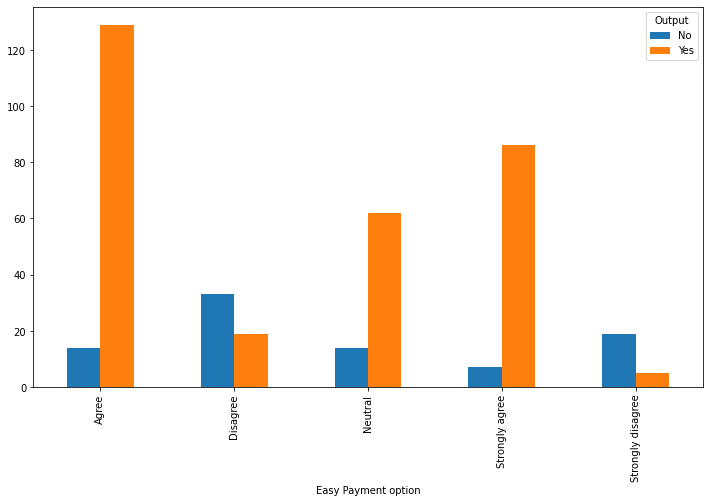

In [ ]:
ax = data.groupby(['Easy Payment option']).Output.value_counts().reset_index(name='counts').pivot(index='Easy Payment option', columns='Output', values='counts').plot(kind='bar', figsize = (12,7))

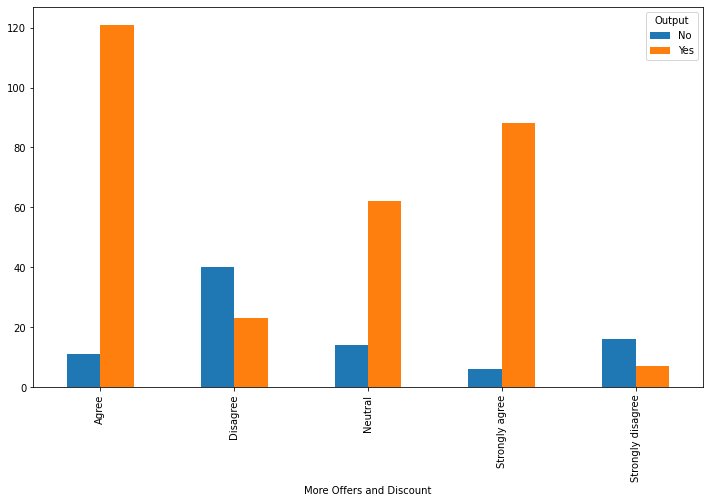

In [ ]:
ax = data.groupby(['More Offers and Discount']).Output.value_counts().reset_index(name='counts').pivot(index='More Offers and Discount', columns='Output', values='counts').plot(kind='bar', 
                                                                                                                                                                                 figsize = (12,7))

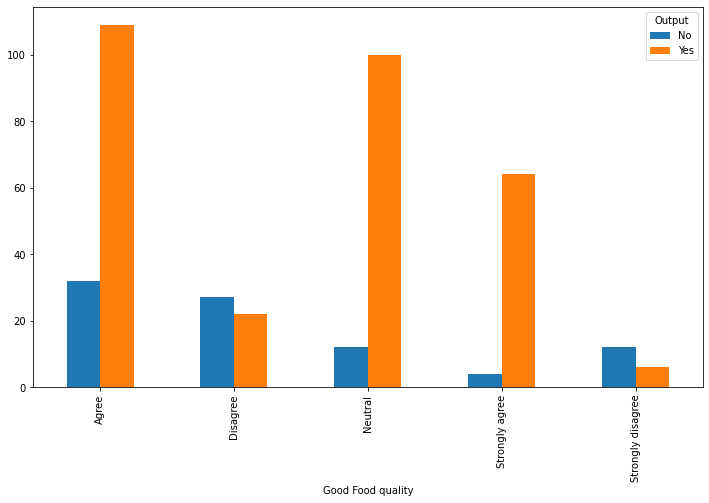

In [ ]:
ax = data.groupby(['Good Food quality']).Output.value_counts().reset_index(name='counts').pivot(index='Good Food quality', columns='Output', values='counts').plot(kind='bar', figsize = (12,7))

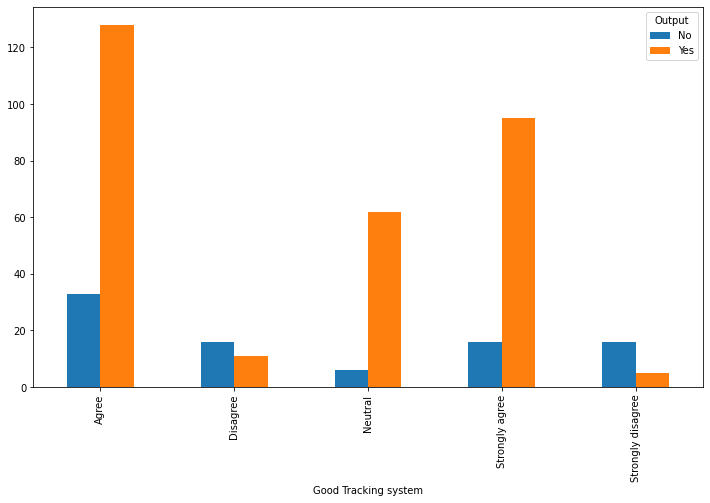

In [ ]:
ax = data.groupby(['Good Tracking system']).Output.value_counts().reset_index(name='counts').pivot(index='Good Tracking system', columns='Output', values='counts').plot(kind='bar', figsize = (12,7))

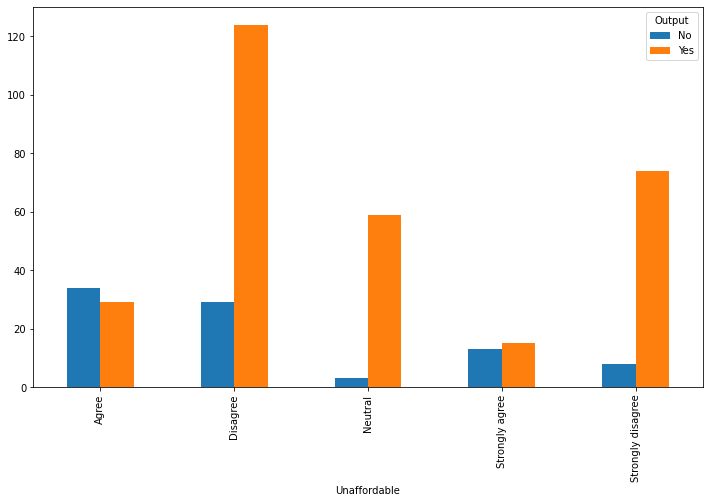

In [ ]:
ax = data.groupby(['Unaffordable']).Output.value_counts().reset_index(name='counts').pivot(index='Unaffordable', columns='Output', values='counts').plot(kind='bar', figsize = (12,7))

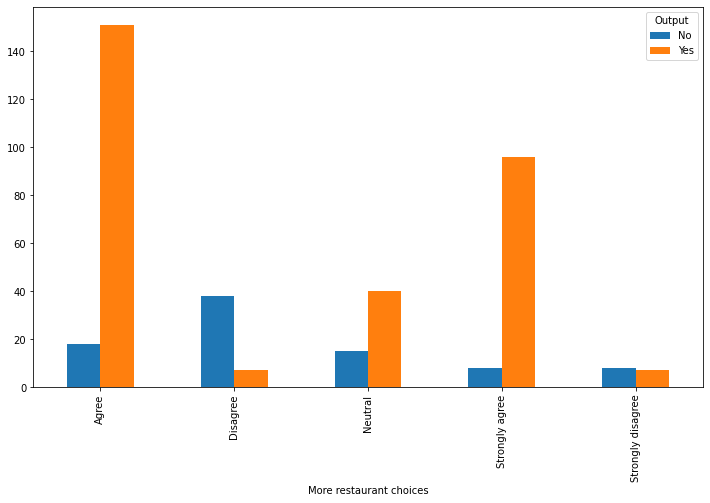

In [ ]:
ax = data.groupby(['More restaurant choices']).Output.value_counts().reset_index(name='counts').pivot(index='More restaurant choices', columns='Output', 
                                                                                                      values='counts').plot(kind='bar', figsize = (12,7))
                                                                                                                                                      

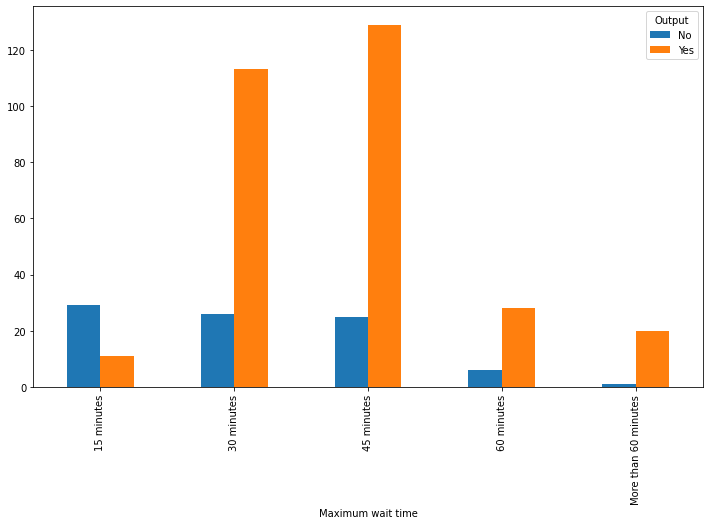

In [ ]:
ax = data.groupby(['Maximum wait time']).Output.value_counts().reset_index(name='counts').pivot(index='Maximum wait time', columns='Output', values='counts').plot(kind='bar', figsize = (12,7))

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Label Encoding

data.columns
colsEnc = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Medium (P1)', 'Medium (P2)', 
           'Meal(P1)', 'Meal(P2)', 'Perference(P1)', 'Perference(P2)', 'Ease and convenient', 
           'Time saving', 'More restaurant choices', 'Easy Payment option', 'More Offers and Discount', 
           'Good Food quality', 'Good Tracking system', 'Self Cooking', 'Health Concern', 
           'Late Delivery', 'Poor Hygiene', 'Bad past experience', 'Unavailability', 'Unaffordable', 
           'Long delivery time', 'Delay of delivery person getting assigned',
           'Delay of delivery person picking up food', 'Wrong order delivered',
           'Missing item', 'Order placed by mistake', 'Influence of time', 'Order Time', 'Maximum wait time', 
           'Residence in busy location', 'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time', 
           'Delivery person ability', 'Influence of rating', 'Less Delivery time','High Quality of package', 
           'Number of calls', 'Politeness', 'Freshness ', 'Temperature', 'Good Taste ', 'Good Quantity', 'Output']

from sklearn.preprocessing import LabelEncoder

data[colsEnc] = data[colsEnc].apply(LabelEncoder().fit_transform)

In [ ]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Family size,Medium (P1),Medium (P2),Meal(P1),Meal(P2),...,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
0,20,0,2,3,4,4,1,2,0,1,...,2,1,1,1,1,1,1,1,1,1
1,24,0,2,3,2,3,1,2,3,0,...,2,4,4,4,4,4,4,4,4,1
2,22,1,2,3,2,3,1,0,2,2,...,2,0,4,1,4,4,0,4,1,1
3,22,0,2,3,4,6,1,1,3,0,...,2,4,0,1,4,4,4,4,0,1
4,22,1,2,3,2,4,2,0,2,0,...,2,0,0,1,0,0,0,4,4,1


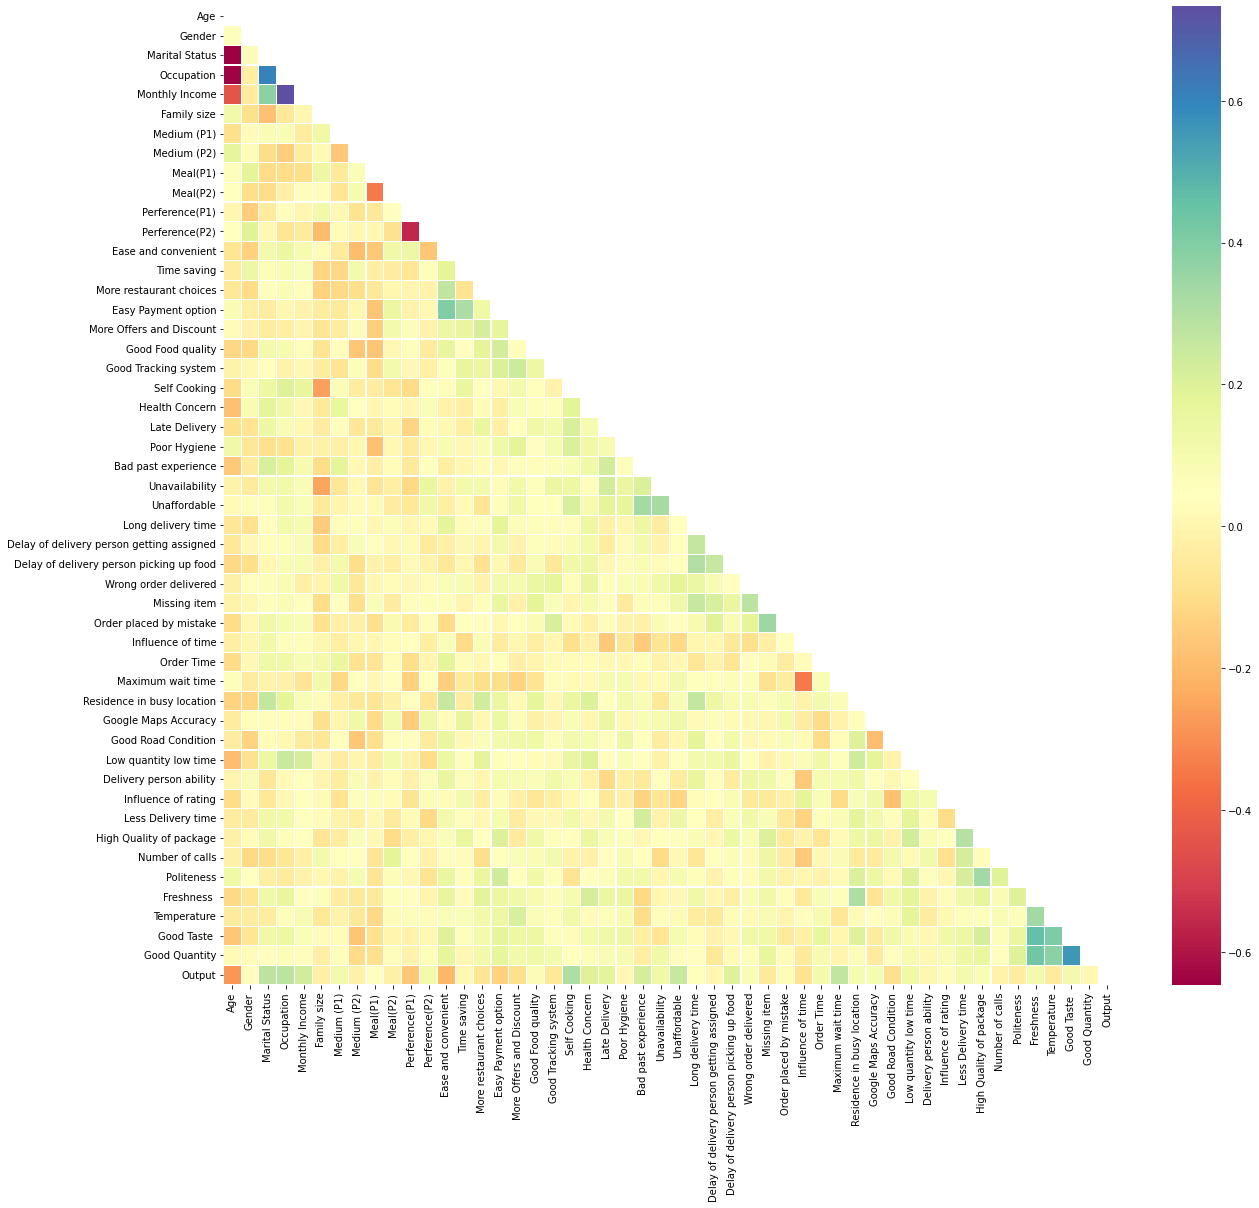

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[20, 18])
sns.heatmap(data.corr(method='spearman'), annot=False, mask=np.triu(data.corr(method='spearman')), cmap='Spectral',
            linewidths=0.1, linecolor='white')


In [ ]:
data.shape

(388, 50)

In [ ]:
# Splitting the examples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 0:49], data['Output'], test_size=0.25, random_state=42)

Logistic Regression

Reference   0   1
Prediction       
0           9   9
1           6  73

Accuracy Score : 0.845360824742268

Classification Report : 
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        15
           1       0.92      0.89      0.91        82

    accuracy                           0.85        97
   macro avg       0.71      0.75      0.73        97
weighted avg       0.86      0.85      0.85        97




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Text(0.5, 257.44, 'Predicted label')

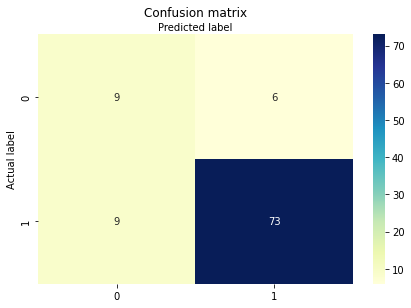

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#Predict the response for test dataset
y_pred=logreg.predict(X_test)

# import the metrics class
from sklearn import metrics
from sklearn.metrics import accuracy_score
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


from sklearn.metrics import classification_report
confusion_matrix = pd.crosstab(y_pred, y_test, rownames=['Prediction'], colnames=['Reference'])
print(confusion_matrix, end='\n\n')
print('Accuracy Score :',accuracy_score(y_test, y_pred), end='\n\n')
print('Classification Report : ')
print(classification_report(y_test, y_pred), end='\n\n')

# Confusion Matrix in heatmap format
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Naive Bayes

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3402061855670103


In [ ]:
# import the metrics class
from sklearn import metrics
from sklearn.metrics import accuracy_score
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Reference    0   1
Prediction        
0           15  64
1            0  18

Accuracy Score : 0.3402061855670103

Classification Report : 
              precision    recall  f1-score   support

           0       0.19      1.00      0.32        15
           1       1.00      0.22      0.36        82

    accuracy                           0.34        97
   macro avg       0.59      0.61      0.34        97
weighted avg       0.87      0.34      0.35        97




Text(0.5, 257.44, 'Predicted label')

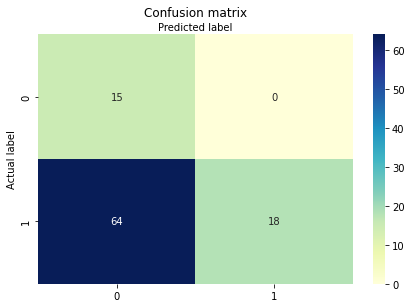

In [ ]:
from sklearn.metrics import classification_report
confusion_matrix = pd.crosstab(y_pred, y_test, rownames=['Prediction'], colnames=['Reference'])
print(confusion_matrix, end='\n\n')
print('Accuracy Score :',accuracy_score(y_test, y_pred), end='\n\n')
print('Classification Report : ')
print(classification_report(y_test, y_pred), end='\n\n')

# Confusion Matrix in heatmap format
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=8, p=1)
knn_best.fit(X_train,y_train.values.ravel())
y_pred = knn_best.predict(X_test)
obs = y_test

In [ ]:
# import the metrics class
from sklearn import metrics
from sklearn.metrics import accuracy_score
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Reference    0   1
Prediction        
0           10   1
1            5  81

Accuracy Score : 0.9381443298969072

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.94      0.99      0.96        82

    accuracy                           0.94        97
   macro avg       0.93      0.83      0.87        97
weighted avg       0.94      0.94      0.93        97




Text(0.5, 257.44, 'Predicted label')

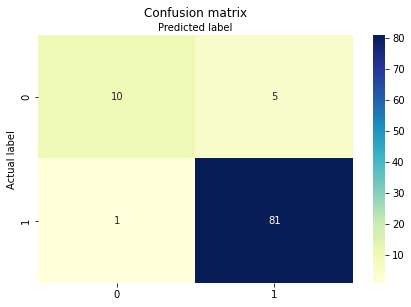

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_pred, y_test, rownames=['Prediction'], colnames=['Reference'])
print(confusion_matrix, end='\n\n')
print('Accuracy Score :',accuracy_score(y_test, y_pred), end='\n\n')
print(classification_report(y_test, y_pred), end='\n\n')

# Confusion Matrix in heatmap format
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Support Vector Machines

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [ ]:
svm_best = svm.SVC(C=5, kernel='rbf')
svm_best.fit(X_train,y_train.values.ravel())
y_pred = svm_best.predict(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics
from sklearn.metrics import accuracy_score
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Reference   0   1
Prediction       
0           8   2
1           7  80

Accuracy Score : 0.9072164948453608

              precision    recall  f1-score   support

           0       0.80      0.53      0.64        15
           1       0.92      0.98      0.95        82

    accuracy                           0.91        97
   macro avg       0.86      0.75      0.79        97
weighted avg       0.90      0.91      0.90        97




Text(0.5, 257.44, 'Predicted label')

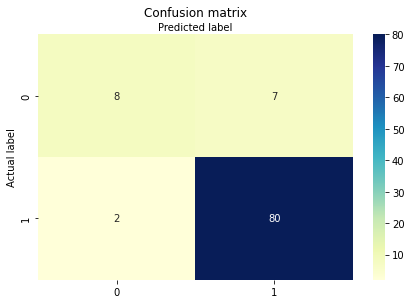

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_pred, y_test, rownames=['Prediction'], colnames=['Reference'])
print(confusion_matrix, end='\n\n')
print('Accuracy Score :',accuracy_score(y_test, y_pred), end='\n\n')
print(classification_report(y_test, y_pred), end='\n\n')

# Confusion Matrix in heatmap format
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ANN

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=50)

In [ ]:
import tensorflow.keras as keras
model = keras.Sequential([
	keras.layers.Dense(49, input_shape=(None, 49), activation='relu'),
  keras.layers.Dense(26, activation='relu'),
  keras.layers.Dense(11, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, None, 49)          2450      
                                                                 
 dense_9 (Dense)             (None, None, 26)          1300      
                                                                 
 dense_10 (Dense)            (None, None, 11)          297       
                                                                 
 dense_11 (Dense)            (None, None, 1)           12        
                                                                 
Total params: 4,059
Trainable params: 4,059
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='RMSprop',
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/50
4/4 [==============================] - 1s 70ms/step - loss: 0.5792 - accuracy: 0.7414 - val_loss: 0.5509 - val_accuracy: 0.7458
Epoch 2/50
4/4 [==============================] - 0s 10ms/step - loss: 0.5271 - accuracy: 0.7629 - val_loss: 0.5542 - val_accuracy: 0.7627
Epoch 3/50
4/4 [==============================] - 0s 9ms/step - loss: 0.5146 - accuracy: 0.7672 - val_loss: 0.5250 - val_accuracy: 0.7627
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 0.4767 - accuracy: 0.7845 - val_loss: 0.5197 - val_accuracy: 0.7458
Epoch 5/50
4/4 [==============================] - 0s 11ms/step - loss: 0.4639 - accuracy: 0.7845 - val_loss: 0.5152 - val_accuracy: 0.7458
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: 0.4510 - accuracy: 0.7931 - val_loss: 0.4963 - val_accuracy: 0.8305
Epoch 7/50
4/4 [==============================] - 0s 11ms/step - loss: 0.4391 - accuracy: 0.8147 - val_loss: 0.5180 - val_accuracy: 0.7458
Epoch 8/50
4/4 [============

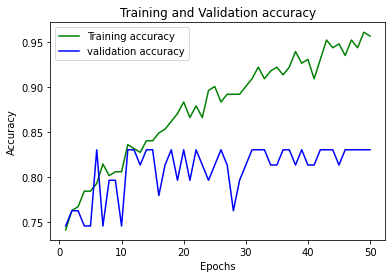

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.3115 - accuracy: 0.9175


[0.3114861845970154, 0.9175257682800293]

Reference   0   1
Prediction       
0.0         8   1
1.0         7  81

Accuracy Score : 0.9175257731958762

Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.92      0.99      0.95        82

    accuracy                           0.92        97
   macro avg       0.90      0.76      0.81        97
weighted avg       0.92      0.92      0.91        97




Text(0.5, 257.44, 'Predicted label')

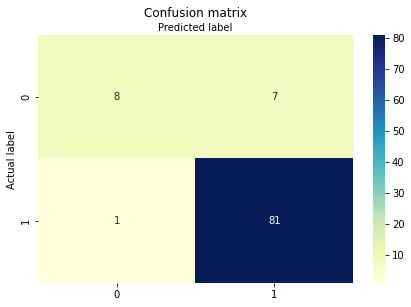

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
for i in range(97):
  if(y_pred[i] > 0.5):
    y_pred[i] = 1
  else:
    y_pred[i] = 0

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

confusion_matrix = pd.crosstab(y_pred, y_test, rownames=['Prediction'], colnames=['Reference'])
print(confusion_matrix, end='\n\n')
print('Accuracy Score :',accuracy_score(y_test, y_pred), end='\n\n')
print('Classification Report : ')
print(classification_report(y_test, y_pred))

# Confusion Matrix in heatmap format
pred = []
for i in range(len(X_test)):
  if(model.predict(X_test.iloc[i].to_numpy().reshape(1,49)) > 0.5):
    pred.append(1)
  else:
    pred.append(0)
cnf_matrix1 = metrics.confusion_matrix(y_test, pred)
cnf_matrix1

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
print()
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')